# Caching R Packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!mkdir -p "/content/drive/My Drive/R_libs"

In [3]:
%load_ext rpy2.ipython

In [4]:
%%R
# Set the R library path to include the Drive-based cache directory
.libPaths(c("/content/drive/My Drive/R_libs", .libPaths()))

# Define a list of packages to be installed in the cached library
packages <- c("ggplot2",
              "dplyr",
              "tidyr",
              "caret",
              "randomForest",
              "rpart",
              "e1071",
              "forecast",
              "pROC",
              "nnet",
              "MASS",
              "hash")

# Loop through each package and install into the cached library only if not already installed there
for (pkg in packages) {
  cached_pkgs <- installed.packages(lib.loc = "/content/drive/My Drive/R_libs")[, "Package"]
  if (!(pkg %in% cached_pkgs)) {
    message(sprintf("Installing package: %s into /content/drive/My Drive/R_libs", pkg))
    install.packages(pkg, lib = "/content/drive/My Drive/R_libs", repos = "http://cran.r-project.org")
  } else {
    message(sprintf("Package %s is already installed in the cached library", pkg))
  }
  library(pkg, character.only = TRUE)
}

# Retrieve a list of all packages installed in the cached library
cached_pkgs <- installed.packages(lib.loc = "/content/drive/My Drive/R_libs")[, "Package"]

# Print the cached packages
cat("Cached packages:\n")
print(cached_pkgs)

Cached packages:
          caret           clock         diagram           dplyr           e1071 
        "caret"         "clock"       "diagram"         "dplyr"         "e1071" 
        foreach        forecast        fracdiff          future    future.apply 
      "foreach"      "forecast"      "fracdiff"        "future"  "future.apply" 
        ggplot2         globals           gower         hardhat            hash 
      "ggplot2"       "globals"         "gower"       "hardhat"          "hash" 
          ipred       iterators            lava         listenv          lmtest 
        "ipred"     "iterators"          "lava"       "listenv"        "lmtest" 
           MASS    ModelMetrics            nnet        numDeriv      parallelly 
         "MASS"  "ModelMetrics"          "nnet"      "numDeriv"    "parallelly" 
           plyr            pROC         prodlim       progressr           proxy 
         "plyr"          "pROC"       "prodlim"     "progressr"         "proxy" 
       quad

Package ggplot2 is already installed in the cached library
Package dplyr is already installed in the cached library

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Package tidyr is already installed in the cached library
Package caret is already installed in the cached library
Loading required package: lattice
Package randomForest is already installed in the cached library
randomForest 4.7-1.2
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:dplyr’:

    combine

The following object is masked from ‘package:ggplot2’:

    margin

Package rpart is already installed in the cached library
Package e1071 is already installed in the cached library
Package forecast is already installed in the cached library
Registered S3 method overwritten by 'quantmod':
  metho

In [5]:
%%R
# Retrieve a list of all packages installed in the cached library
cached_pkgs <- installed.packages(lib.loc = "/content/drive/My Drive/R_libs")[, "Package"]

# Print the cached packages
cat("Cached packages:\n")
print(cached_pkgs)

# Loop through each package and attempt to load it
invisible(lapply(cached_pkgs, function(pkg) {
  if (!suppressWarnings(require(pkg, character.only = TRUE, quietly = TRUE))) {
    message(sprintf("Could not load package: %s", pkg))
  } else {
    message(sprintf("Loaded package: %s", pkg))
  }
}))

Cached packages:
          caret           clock         diagram           dplyr           e1071 
        "caret"         "clock"       "diagram"         "dplyr"         "e1071" 
        foreach        forecast        fracdiff          future    future.apply 
      "foreach"      "forecast"      "fracdiff"        "future"  "future.apply" 
        ggplot2         globals           gower         hardhat            hash 
      "ggplot2"       "globals"         "gower"       "hardhat"          "hash" 
          ipred       iterators            lava         listenv          lmtest 
        "ipred"     "iterators"          "lava"       "listenv"        "lmtest" 
           MASS    ModelMetrics            nnet        numDeriv      parallelly 
         "MASS"  "ModelMetrics"          "nnet"      "numDeriv"    "parallelly" 
           plyr            pROC         prodlim       progressr           proxy 
         "plyr"          "pROC"       "prodlim"     "progressr"         "proxy" 
       quad

Loaded package: caret
Loaded package: clock
Loaded package: diagram
Loaded package: dplyr
Loaded package: e1071
Loaded package: foreach
Loaded package: forecast
Loaded package: fracdiff

Attaching package: ‘future’

The following object is masked from ‘package:caret’:

    cluster

Loaded package: future
Loaded package: future.apply
Loaded package: ggplot2
Loaded package: globals
Loaded package: gower

Attaching package: ‘hardhat’

The following object is masked from ‘package:e1071’:

    tune

Loaded package: hardhat
Loaded package: hash
Loaded package: ipred
Loaded package: iterators

Attaching package: ‘lava’

The following object is masked from ‘package:dplyr’:

    vars

The following object is masked from ‘package:ggplot2’:

    vars

Loaded package: lava
Loaded package: listenv

Attaching package: ‘zoo’

The following objects are masked from ‘package:lava’:

    index, index<-

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loaded package: l

# With R Magic Command

In [6]:
%%R
# Include the cached library
.libPaths(c("/content/drive/My Drive/R_libs", .libPaths()))

# Retrieve a list of all packages installed in the cached library
cached_pkgs <- installed.packages(lib.loc = "/content/drive/My Drive/R_libs")[, "Package"]

# Loop through each package and attempt to load it
invisible(lapply(cached_pkgs, function(pkg) {
  if (!suppressWarnings(require(pkg, character.only = TRUE, quietly = TRUE))) {
    message(sprintf("Could not load package: %s", pkg))
  } else {
    message(sprintf("Loaded package: %s", pkg))
  }
}))

# Set seed for reproducibility
set.seed(123)

# Load the iris dataset
data(iris)

# Define the complete set of levels from the full dataset
common_levels <- levels(iris$Species)

# Split the data: 80% for training and 20% for testing
library(caret)
trainIndex <- createDataPartition(iris$Species, p = 0.8, list = FALSE)
trainData <- iris[trainIndex, ]
testData <- iris[-trainIndex, ]

# Create hash maps for storing models and predictions
models <- hash()       # To store trained models
predictions <- hash()  # To store predicted classes for each model

# Initialize data frames to store predictions and metrics
predictions_df <- data.frame(Model = character(),
                             Observation = integer(),
                             Predicted = character(),
                             Actual = character(),
                             stringsAsFactors = FALSE)

metrics_df <- data.frame(Model = character(),
                         Accuracy = numeric(),
                         Precision = numeric(),
                         Recall = numeric(),
                         F1 = numeric(),
                         ROC_AUC = numeric(),
                         stringsAsFactors = FALSE)

# Function to compute metrics manually without a confusion matrix
compute_metrics <- function(pred_factor, actual_factor, levels_vec) {
  # Accuracy: proportion of correct predictions
  accuracy <- sum(pred_factor == actual_factor) / length(actual_factor)

  # Initialize vectors for per-class precision, recall and F1
  precision_vector <- numeric(length(levels_vec))
  recall_vector <- numeric(length(levels_vec))
  f1_vector <- numeric(length(levels_vec))

  for (i in seq_along(levels_vec)) {
    class_label <- levels_vec[i]
    TP <- sum(pred_factor == class_label & actual_factor == class_label)
    FP <- sum(pred_factor == class_label & actual_factor != class_label)
    FN <- sum(pred_factor != class_label & actual_factor == class_label)

    precision_vector[i] <- if ((TP + FP) > 0) TP / (TP + FP) else NA
    recall_vector[i] <- if ((TP + FN) > 0) TP / (TP + FN) else NA
    if (!is.na(precision_vector[i]) && !is.na(recall_vector[i]) && (precision_vector[i] + recall_vector[i]) > 0) {
      f1_vector[i] <- 2 * precision_vector[i] * recall_vector[i] / (precision_vector[i] + recall_vector[i])
    } else {
      f1_vector[i] <- NA
    }
  }

  # Macro-average over classes
  macro_precision <- mean(precision_vector, na.rm = TRUE)
  macro_recall <- mean(recall_vector, na.rm = TRUE)
  macro_f1 <- mean(f1_vector, na.rm = TRUE)

  return(list(acc = accuracy, precision = macro_precision, recall = macro_recall, f1 = macro_f1))
}

# Train various machine learning models

# 1. Random Forest
rf_model <- randomForest(Species ~ ., data = trainData)
models[["RandomForest"]] <- rf_model

# 2. Naive Bayes
nb_model <- naiveBayes(Species ~ ., data = trainData)
models[["NaiveBayes"]] <- nb_model

# 3. Decision Tree (using rpart)
dt_model <- rpart(Species ~ ., data = trainData, method = "class")
models[["DecisionTree"]] <- dt_model

# 4. Support Vector Machine (SVM) with probability estimates enabled
svm_model <- svm(Species ~ ., data = trainData, probability = TRUE)
models[["SVM"]] <- svm_model

# 5. Logistic Regression (Multinomial using nnet)
logistic_model <- multinom(Species ~ ., data = trainData, trace = FALSE)
models[["LogisticRegression"]] <- logistic_model

# 6. k-Nearest Neighbors (kNN) using caret's train function
knn_model <- train(Species ~ ., data = trainData, method = "knn", tuneLength = 3)
models[["KNN"]] <- knn_model

# 7. Linear Discriminant Analysis (LDA)
lda_model <- lda(Species ~ ., data = trainData)
models[["LDA"]] <- lda_model

# Iterate over each model to generate predictions and compute metrics
for (model_name in keys(models)) {
  model <- models[[model_name]]

  # Generate class predictions based on model type
  if (model_name %in% c("DecisionTree", "LogisticRegression")) {
    pred_class <- predict(model, newdata = testData, type = "class")
  } else if (model_name == "LDA") {
    pred_class <- predict(model, newdata = testData)$class
  } else {
    pred_class <- predict(model, newdata = testData)
  }

  # Save predictions to the hash map
  predictions[[model_name]] <- pred_class

  # Force factors to have all levels from the full dataset
  pred_factor <- factor(pred_class, levels = common_levels)
  actual_factor <- factor(testData$Species, levels = common_levels)

  # Debug prints: show factor levels
  cat("Model:", model_name, "- Predicted levels:", paste(levels(pred_factor), collapse=", "), "\n")
  cat("Model:", model_name, "- Actual levels:", paste(levels(actual_factor), collapse=", "), "\n")

  # Compute metrics manually without using confusionMatrix
  met <- compute_metrics(pred_factor, actual_factor, common_levels)

  # Prepare to compute probabilities for ROC-AUC
  if (model_name == "DecisionTree") {
    probs <- predict(model, newdata = testData, type = "prob")
  } else if (model_name == "LogisticRegression") {
    probs <- predict(model, newdata = testData, type = "probs")
  } else if (model_name == "LDA") {
    probs <- predict(model, newdata = testData)$posterior
  } else if (model_name == "SVM") {
    pred_obj <- predict(model, newdata = testData, probability = TRUE)
    probs <- attr(pred_obj, "probabilities")
  } else if (model_name == "KNN") {
    probs <- predict(model, newdata = testData, type = "prob")
  } else if (model_name == "NaiveBayes") {
    probs <- predict(model, newdata = testData, type = "raw")
  } else if (model_name == "RandomForest") {
    probs <- predict(model, newdata = testData, type = "prob")
  }

  roc_auc <- tryCatch({
    roc_obj <- multiclass.roc(actual_factor, as.matrix(probs))
    as.numeric(roc_obj$auc)
  }, error = function(e) {
    cat("Model:", model_name, "- Error in ROC AUC computation:", e$message, "\n")
    NA
  })

  # Append the computed metrics for this model to metrics_df
  metrics_df <- rbind(metrics_df,
                      data.frame(Model = model_name,
                                 Accuracy = met$acc,
                                 Precision = met$precision,
                                 Recall = met$recall,
                                 F1 = met$f1,
                                 ROC_AUC = roc_auc,
                                 stringsAsFactors = FALSE))

  # Append predictions for each observation to predictions_df
  for (i in seq_along(pred_class)) {
    predictions_df <- rbind(predictions_df,
                            data.frame(Model = model_name,
                                       Observation = i,
                                       Predicted = as.character(pred_class[i]),
                                       Actual = as.character(testData$Species[i]),
                                       stringsAsFactors = FALSE))
  }
}

# Save predictions and metrics to CSV files
write.csv(predictions_df, "predictions.csv", row.names = FALSE)
write.csv(metrics_df, "metrics.csv", row.names = FALSE)

# Print evaluation metrics to console
cat("\nEvaluation Metrics for each model:\n")
print(metrics_df)
cat("\n")

Model: DecisionTree - Predicted levels: setosa, versicolor, virginica 
Model: DecisionTree - Actual levels: setosa, versicolor, virginica 
Model: KNN - Predicted levels: setosa, versicolor, virginica 
Model: KNN - Actual levels: setosa, versicolor, virginica 
Model: LDA - Predicted levels: setosa, versicolor, virginica 
Model: LDA - Actual levels: setosa, versicolor, virginica 
Model: LogisticRegression - Predicted levels: setosa, versicolor, virginica 
Model: LogisticRegression - Actual levels: setosa, versicolor, virginica 
Model: NaiveBayes - Predicted levels: setosa, versicolor, virginica 
Model: NaiveBayes - Actual levels: setosa, versicolor, virginica 
Model: RandomForest - Predicted levels: setosa, versicolor, virginica 
Model: RandomForest - Actual levels: setosa, versicolor, virginica 
Model: SVM - Predicted levels: setosa, versicolor, virginica 
Model: SVM - Actual levels: setosa, versicolor, virginica 

Evaluation Metrics for each model:
               Model  Accuracy Precis

Loaded package: caret
Loaded package: clock
Loaded package: diagram
Loaded package: dplyr
Loaded package: e1071
Loaded package: foreach
Loaded package: forecast
Loaded package: fracdiff
Loaded package: future
Loaded package: future.apply
Loaded package: ggplot2
Loaded package: globals
Loaded package: gower
Loaded package: hardhat
Loaded package: hash
Loaded package: ipred
Loaded package: iterators
Loaded package: lava
Loaded package: listenv
Loaded package: lmtest
Loaded package: MASS
Loaded package: ModelMetrics
Loaded package: nnet
Loaded package: numDeriv
Loaded package: parallelly
Loaded package: plyr
Loaded package: pROC
Loaded package: prodlim
Loaded package: progressr
Loaded package: proxy
Loaded package: quadprog
Loaded package: quantmod
Loaded package: randomForest
Loaded package: RcppArmadillo
Loaded package: recipes
Loaded package: reshape2
Loaded package: rpart
Loaded package: shape
Loaded package: sparsevctrs
Loaded package: SQUAREM
Loaded package: tidyr
Loaded package: ti

                Model  Accuracy  Precision    Recall        F1   ROC_AUC
0        DecisionTree  0.933333   0.944444  0.933333  0.932660  0.966667
1                 KNN  1.000000   1.000000  1.000000  1.000000  1.000000
2                 LDA  0.966667   0.969697  0.966667  0.966583  1.000000
3  LogisticRegression  0.933333   0.944444  0.933333  0.932660  1.000000
4          NaiveBayes  0.933333   0.944444  0.933333  0.932660  0.990000
5        RandomForest  0.933333   0.944444  0.933333  0.932660  0.996667
6                 SVM  0.933333   0.944444  0.933333  0.932660  0.996667




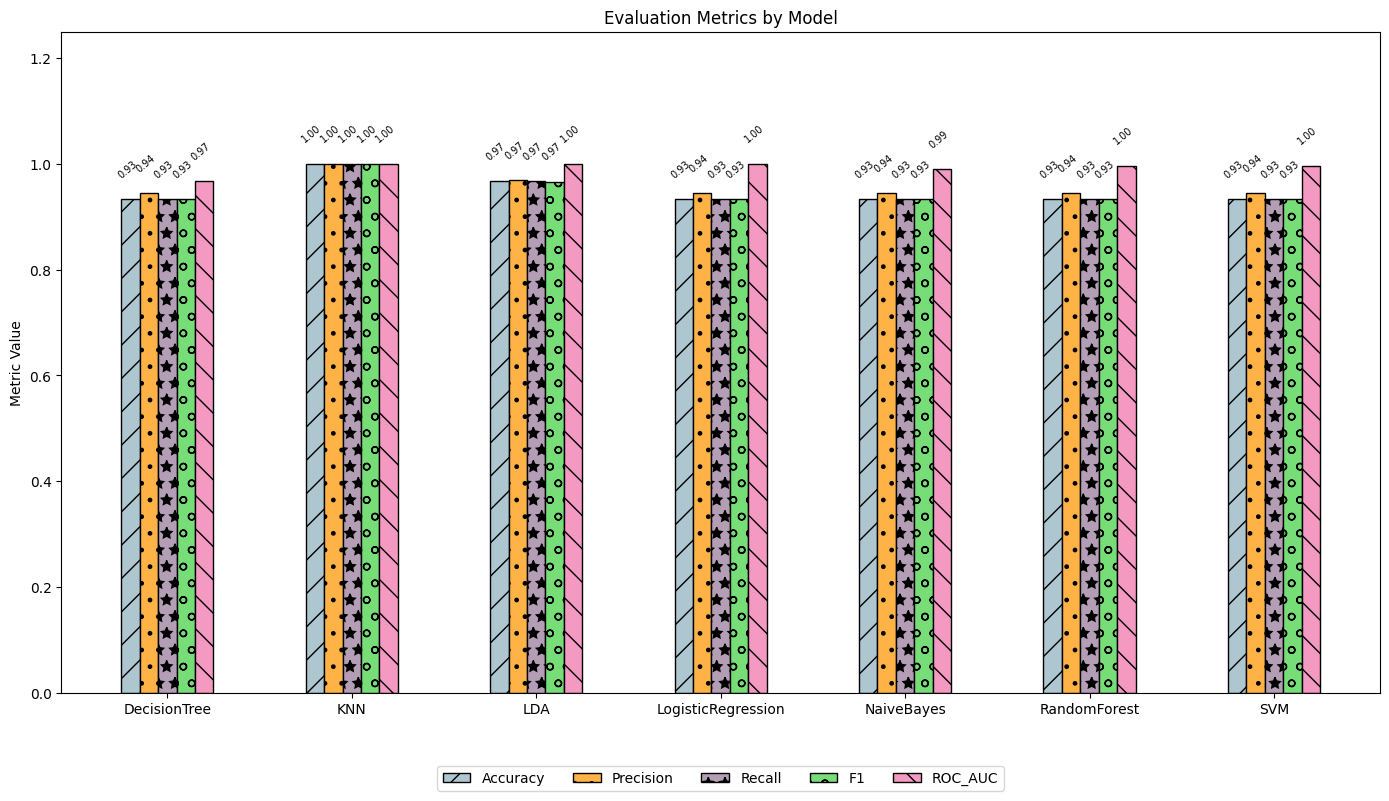

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the metrics CSV produced by the R script
metrics = pd.read_csv('metrics.csv')
print(metrics)
print("\n")

# Define the metrics to plot
metric_columns = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC_AUC']

# Prepare positions for the grouped bar plot
models = metrics['Model']
x = np.arange(len(models))

# Set bar width
bar_width = 0.1

# Set figure size
fig, ax = plt.subplots(figsize=(14, 8))

# Define a set of pastel colors
pastel_colors = [
    '#AEC6CF',  # pastel blue
    '#FFB347',  # pastel orange
    '#B39EB5',  # pastel purple
    '#77DD77',  # pastel green
    '#F49AC2'   # pastel pink
]

# Define the hatch patterns
hatches = ['/', '.', '*', 'o', '\\']

# Increase the y-limit
ax.set_ylim(0, 1.25)

# Plot each metric as a set of bars
for i, metric in enumerate(metric_columns):
    values = metrics[metric]
    bars = ax.bar(
        x + i * bar_width,
        values,
        width=bar_width,
        label=metric,
        color=pastel_colors[i],
        hatch=hatches[i],
        edgecolor='black'
    )

    # Annotate each bar with its value
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 0.05,          # increase offset
                f'{height:.2f}',
                ha='center',
                va='bottom',
                fontsize=7,
                rotation=40,            # rotate the text
                rotation_mode='anchor'
            )

# Set the x-axis ticks and labels
ax.set_xticks(x + bar_width * (len(metric_columns) / 2 - 0.5))
ax.set_xticklabels(models)
ax.set_ylabel("Metric Value")
ax.set_title("Evaluation Metrics by Model")

# Adjust the bottom margin
fig.subplots_adjust(bottom=0.2)

# Place the legend below the plot
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),  # negative y-offset to push it below the axes
    fancybox=True,
    shadow=False,
    ncol=len(metric_columns)
)

plt.tight_layout()
plt.show()

# With Writefile Command

In [8]:
%%writefile ml_script.R
# Include the cached library
.libPaths(c("/content/drive/My Drive/R_libs", .libPaths()))

# Retrieve a list of all packages installed in the cached library
cached_pkgs <- installed.packages(lib.loc = "/content/drive/My Drive/R_libs")[, "Package"]

# Loop through each package and attempt to load it
invisible(lapply(cached_pkgs, function(pkg) {
  if (!suppressWarnings(require(pkg, character.only = TRUE, quietly = TRUE))) {
    message(sprintf("Could not load package: %s", pkg))
  } else {
    message(sprintf("Loaded package: %s", pkg))
  }
}))

# Set seed for reproducibility
set.seed(123)

# Load the iris dataset
data(iris)

# Define the complete set of levels from the full dataset
common_levels <- levels(iris$Species)

# Split the data: 80% for training and 20% for testing
library(caret)
trainIndex <- createDataPartition(iris$Species, p = 0.8, list = FALSE)
trainData <- iris[trainIndex, ]
testData <- iris[-trainIndex, ]

# Create hash maps for storing models and predictions
models <- hash()       # To store trained models
predictions <- hash()  # To store predicted classes for each model

# Initialize data frames to store predictions and metrics
predictions_df <- data.frame(Model = character(),
                             Observation = integer(),
                             Predicted = character(),
                             Actual = character(),
                             stringsAsFactors = FALSE)

metrics_df <- data.frame(Model = character(),
                         Accuracy = numeric(),
                         Precision = numeric(),
                         Recall = numeric(),
                         F1 = numeric(),
                         ROC_AUC = numeric(),
                         stringsAsFactors = FALSE)

# Function to compute metrics manually without a confusion matrix
compute_metrics <- function(pred_factor, actual_factor, levels_vec) {
  # Accuracy: proportion of correct predictions
  accuracy <- sum(pred_factor == actual_factor) / length(actual_factor)

  # Initialize vectors for per-class precision, recall and F1
  precision_vector <- numeric(length(levels_vec))
  recall_vector <- numeric(length(levels_vec))
  f1_vector <- numeric(length(levels_vec))

  for (i in seq_along(levels_vec)) {
    class_label <- levels_vec[i]
    TP <- sum(pred_factor == class_label & actual_factor == class_label)
    FP <- sum(pred_factor == class_label & actual_factor != class_label)
    FN <- sum(pred_factor != class_label & actual_factor == class_label)

    precision_vector[i] <- if ((TP + FP) > 0) TP / (TP + FP) else NA
    recall_vector[i] <- if ((TP + FN) > 0) TP / (TP + FN) else NA
    if (!is.na(precision_vector[i]) && !is.na(recall_vector[i]) && (precision_vector[i] + recall_vector[i]) > 0) {
      f1_vector[i] <- 2 * precision_vector[i] * recall_vector[i] / (precision_vector[i] + recall_vector[i])
    } else {
      f1_vector[i] <- NA
    }
  }

  # Macro-average over classes
  macro_precision <- mean(precision_vector, na.rm = TRUE)
  macro_recall <- mean(recall_vector, na.rm = TRUE)
  macro_f1 <- mean(f1_vector, na.rm = TRUE)

  return(list(acc = accuracy, precision = macro_precision, recall = macro_recall, f1 = macro_f1))
}

# Train various machine learning models

# 1. Random Forest
rf_model <- randomForest(Species ~ ., data = trainData)
models[["RandomForest"]] <- rf_model

# 2. Naive Bayes
nb_model <- naiveBayes(Species ~ ., data = trainData)
models[["NaiveBayes"]] <- nb_model

# 3. Decision Tree (using rpart)
dt_model <- rpart(Species ~ ., data = trainData, method = "class")
models[["DecisionTree"]] <- dt_model

# 4. Support Vector Machine (SVM) with probability estimates enabled
svm_model <- svm(Species ~ ., data = trainData, probability = TRUE)
models[["SVM"]] <- svm_model

# 5. Logistic Regression (Multinomial using nnet)
logistic_model <- multinom(Species ~ ., data = trainData, trace = FALSE)
models[["LogisticRegression"]] <- logistic_model

# 6. k-Nearest Neighbors (kNN) using caret's train function
knn_model <- train(Species ~ ., data = trainData, method = "knn", tuneLength = 3)
models[["KNN"]] <- knn_model

# 7. Linear Discriminant Analysis (LDA)
lda_model <- lda(Species ~ ., data = trainData)
models[["LDA"]] <- lda_model

# Iterate over each model to generate predictions and compute metrics
for (model_name in keys(models)) {
  model <- models[[model_name]]

  # Generate class predictions based on model type
  if (model_name %in% c("DecisionTree", "LogisticRegression")) {
    pred_class <- predict(model, newdata = testData, type = "class")
  } else if (model_name == "LDA") {
    pred_class <- predict(model, newdata = testData)$class
  } else {
    pred_class <- predict(model, newdata = testData)
  }

  # Save predictions to the hash map
  predictions[[model_name]] <- pred_class

  # Force factors to have all levels from the full dataset
  pred_factor <- factor(pred_class, levels = common_levels)
  actual_factor <- factor(testData$Species, levels = common_levels)

  # Debug prints: show factor levels
  cat("Model:", model_name, "- Predicted levels:", paste(levels(pred_factor), collapse=", "), "\n")
  cat("Model:", model_name, "- Actual levels:", paste(levels(actual_factor), collapse=", "), "\n")

  # Compute metrics manually without using confusionMatrix
  met <- compute_metrics(pred_factor, actual_factor, common_levels)

  # Prepare to compute probabilities for ROC-AUC
  if (model_name == "DecisionTree") {
    probs <- predict(model, newdata = testData, type = "prob")
  } else if (model_name == "LogisticRegression") {
    probs <- predict(model, newdata = testData, type = "probs")
  } else if (model_name == "LDA") {
    probs <- predict(model, newdata = testData)$posterior
  } else if (model_name == "SVM") {
    pred_obj <- predict(model, newdata = testData, probability = TRUE)
    probs <- attr(pred_obj, "probabilities")
  } else if (model_name == "KNN") {
    probs <- predict(model, newdata = testData, type = "prob")
  } else if (model_name == "NaiveBayes") {
    probs <- predict(model, newdata = testData, type = "raw")
  } else if (model_name == "RandomForest") {
    probs <- predict(model, newdata = testData, type = "prob")
  }

  roc_auc <- tryCatch({
    roc_obj <- multiclass.roc(actual_factor, as.matrix(probs))
    as.numeric(roc_obj$auc)
  }, error = function(e) {
    cat("Model:", model_name, "- Error in ROC AUC computation:", e$message, "\n")
    NA
  })

  # Append the computed metrics for this model to metrics_df
  metrics_df <- rbind(metrics_df,
                      data.frame(Model = model_name,
                                 Accuracy = met$acc,
                                 Precision = met$precision,
                                 Recall = met$recall,
                                 F1 = met$f1,
                                 ROC_AUC = roc_auc,
                                 stringsAsFactors = FALSE))

  # Append predictions for each observation to predictions_df
  for (i in seq_along(pred_class)) {
    predictions_df <- rbind(predictions_df,
                            data.frame(Model = model_name,
                                       Observation = i,
                                       Predicted = as.character(pred_class[i]),
                                       Actual = as.character(testData$Species[i]),
                                       stringsAsFactors = FALSE))
  }
}

# Save predictions and metrics to CSV files
write.csv(predictions_df, "predictions.csv", row.names = FALSE)
write.csv(metrics_df, "metrics.csv", row.names = FALSE)

# Print evaluation metrics to console
cat("\nEvaluation Metrics for each model:\n")
print(metrics_df)
cat("\n")

Overwriting ml_script.R


In [9]:
!Rscript ml_script.R

Loaded package: caret
Loaded package: clock
Loaded package: diagram

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loaded package: dplyr
Loaded package: e1071
Loaded package: foreach
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Loaded package: forecast
Loaded package: fracdiff

Attaching package: ‘future’

The following object is masked from ‘package:caret’:

    cluster

Loaded package: future
Loaded package: future.apply
Loaded package: ggplot2
Loaded package: globals
Loaded package: gower

Attaching package: ‘hardhat’

The following object is masked from ‘package:e1071’:

    tune

Loaded package: hardhat
hash-2.2.6.3 provided by Decision Patterns

Loaded package: hash
Loaded package: ipred
Loaded package: iterators

Attaching package: ‘lava’

The following object is masked from ‘pa

                Model  Accuracy  Precision    Recall        F1   ROC_AUC
0        DecisionTree  0.933333   0.944444  0.933333  0.932660  0.966667
1                 KNN  1.000000   1.000000  1.000000  1.000000  1.000000
2                 LDA  0.966667   0.969697  0.966667  0.966583  1.000000
3  LogisticRegression  0.933333   0.944444  0.933333  0.932660  1.000000
4          NaiveBayes  0.933333   0.944444  0.933333  0.932660  0.990000
5        RandomForest  0.933333   0.944444  0.933333  0.932660  0.996667
6                 SVM  0.933333   0.944444  0.933333  0.932660  0.996667




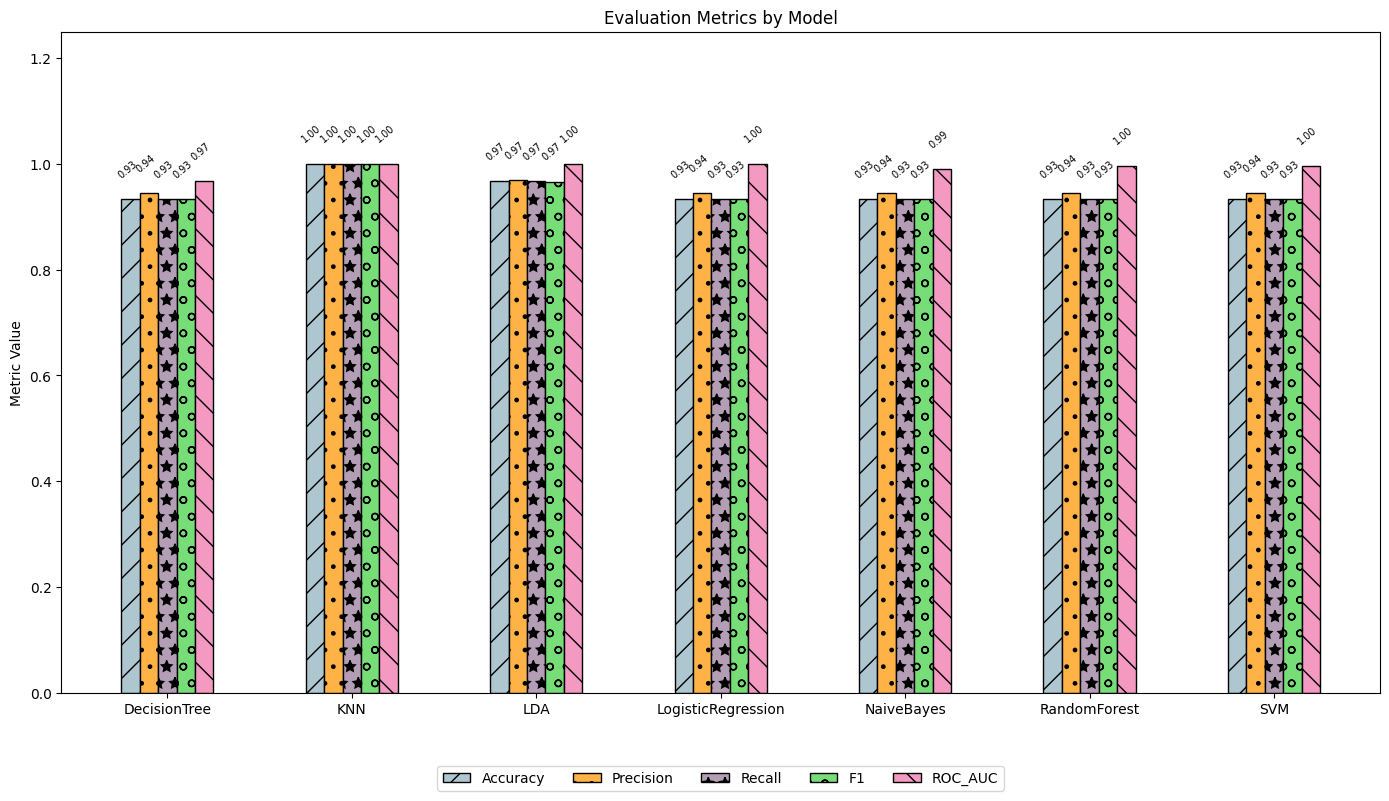

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the metrics CSV produced by the R script
metrics = pd.read_csv('metrics.csv')
print(metrics)
print("\n")

# Define the metrics to plot
metric_columns = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC_AUC']

# Prepare positions for the grouped bar plot
models = metrics['Model']
x = np.arange(len(models))

# Set bar width
bar_width = 0.1

# Set figure size
fig, ax = plt.subplots(figsize=(14, 8))

# Define a set of pastel colors
pastel_colors = [
    '#AEC6CF',  # pastel blue
    '#FFB347',  # pastel orange
    '#B39EB5',  # pastel purple
    '#77DD77',  # pastel green
    '#F49AC2'   # pastel pink
]

# Define the hatch patterns
hatches = ['/', '.', '*', 'o', '\\']

# Increase the y-limit
ax.set_ylim(0, 1.25)

# Plot each metric as a set of bars
for i, metric in enumerate(metric_columns):
    values = metrics[metric]
    bars = ax.bar(
        x + i * bar_width,
        values,
        width=bar_width,
        label=metric,
        color=pastel_colors[i],
        hatch=hatches[i],
        edgecolor='black'
    )

    # Annotate each bar with its value
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 0.05,          # increase offset
                f'{height:.2f}',
                ha='center',
                va='bottom',
                fontsize=7,
                rotation=40,            # rotate the text
                rotation_mode='anchor'
            )

# Set the x-axis ticks and labels
ax.set_xticks(x + bar_width * (len(metric_columns) / 2 - 0.5))
ax.set_xticklabels(models)
ax.set_ylabel("Metric Value")
ax.set_title("Evaluation Metrics by Model")

# Adjust the bottom margin
fig.subplots_adjust(bottom=0.2)

# Place the legend below the plot
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),  # negative y-offset to push it below the axes
    fancybox=True,
    shadow=False,
    ncol=len(metric_columns)
)

plt.tight_layout()
plt.show()